# **Supervised Learning with scikit-learn**

In [1]:
import sys
print(sys.version)

3.10.13 (main, Feb  6 2024, 19:53:26) [GCC 9.4.0]


In this chapter, you'll be introduced to classification problems and learn how to solve them using supervised learning techniques. You'll learn how to split data into training and test sets, fit a model, make predictions, and evaluate accuracy. You’ll discover the relationship between model complexity and performance, applying what you learn to a churn dataset, where you will classify the churn status of a telecom company's customers.

[Reference link!](https://gist.github.com/michaelmallari/4650110348136e6bf7b42eaf5aeab099)

## Chapter 1 - Classification

**k-Nearest Neighbors: Fit**

In this exercise, you will build your first classification model using the churn_df dataset, which has been preloaded for the remainder of the chapter.

The target, "churn", needs to be a single column with the same number of observations as the feature data. The feature data has already been converted into numpy arrays.

In [2]:
#import libraries requeired
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.width", 10000)

#calling the file 
churn_df = pd.read_csv('telecom_churn_clean.csv')
print(churn_df.head(3))


   Unnamed: 0  account_length  area_code  international_plan  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  total_night_charge  total_intl_minutes  total_intl_calls  total_intl_charge  customer_service_calls  churn
0           0             128        415                   0                1                     25              265.1              110             45.07              197.4               99             16.78                244.7                 91               11.01                10.0                 3               2.70                       1      0
1           1             107        415                   0                1                     26              161.6              123             27.47              195.5              103             16.62                254.4                103               11.45                13

/tmp/ipykernel_2185/2891271126.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

**k-Nearest Neighbors: Predict**

Now you have fit a KNN classifier, you can use it to predict the label of new data points. All available data was used for training, however, fortunately, there are new observations available. These have been preloaded for you as X_new.

The model knn, which you created and fit the data in the last exercise, has been preloaded for you. You will use your classifier to predict the labels of a set of new data points:

    X_new = np.array([[30.0, 17.5],
                    [107.0, 24.1],
                    [213.0, 10.9]])

In [4]:
# X_new
X_new = np.array([[30.0, 17.5],
                 [107.0, 24.1],
                 [213.0, 10.9]])

#Create y_pred by predicting the target values of the unseen features X_new.
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


**Train/test split + computing accuracy**

In [ ]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


**Overfitting and underfitting**


In [ ]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors = neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


**Visualizing model complexity**

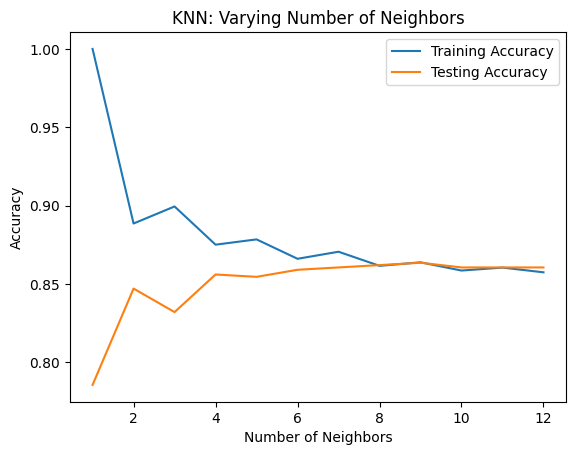

In [ ]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label = "Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label = "Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

## Chapter 2 - Regression

In [9]:
import pandas as pd
diabete_df = pd.read_csv('diabetes_clean.csv')
print(diabete_df.head(3))

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  diabetes
0            6      148         72       35        0  33.6  0.627   50         1
1            1       85         66       29        0  26.6  0.351   31         0
2            8      183         64        0        0  23.3  0.672   32         1


In [12]:
X = diabete_df.drop('glucose', axis=1).values #dropping 'glucose from df'
y = diabete_df['glucose'].values # assigning 'glucose to 'y'
print (type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [17]:
import numpy as np

X_bmi = X[:,3] 
print(y.shape, X_bmi.shape) #X_bmi is correct form for the model

(768,) (768,)


In [ ]:
import matplotlib.pyplot as plt
plpt.scatter(X_bmi,y)
plt.ylabel('Blood Glucose(mg/dl)')
plt.xlabel()


## Chapter 3 - Fine-Tuning Your Model

## Chapter 4 - Preprocessing and Pipelines
